In [58]:
import pandas as pd


df = pd.read_csv('/content/data (1).csv')
print(df.describe())


          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000  
25%      1.000000   34.0

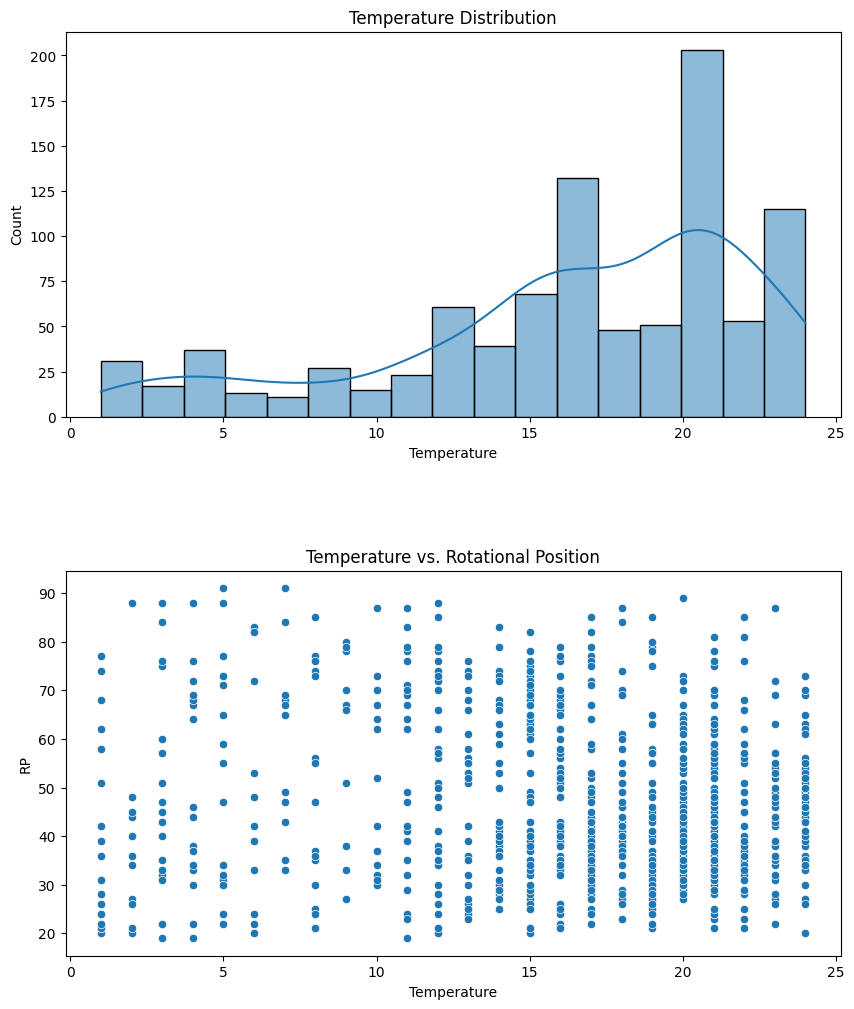

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Histogram of Temperature
sns.histplot(df['Temperature'], kde=True, ax=ax[0])
ax[0].set_title('Temperature Distribution')

# Scatter Plot for Temperature vs. RPM
sns.scatterplot(x='Temperature', y='RP', data=df, ax=ax[1])
ax[1].set_title('Temperature vs. Rotational Position')

# Adjust the spacing between the plots
plt.subplots_adjust(hspace=0.4)

plt.show()


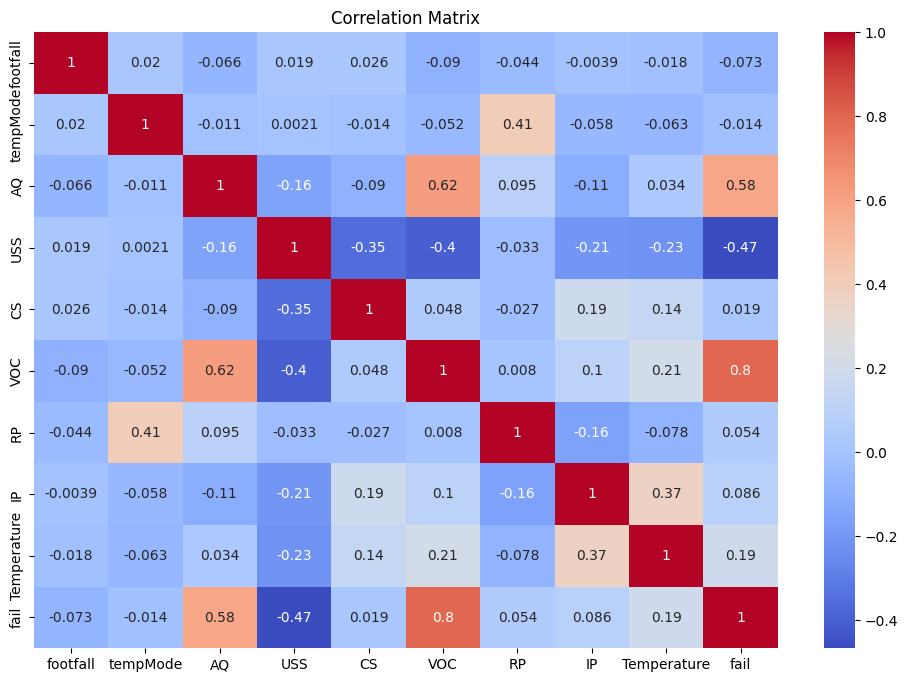

In [60]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Number of outliers in 'Temperature': 48
Number of outliers in 'RP': 0
Number of outliers in 'AQ': 0
Number of outliers in 'USS': 0


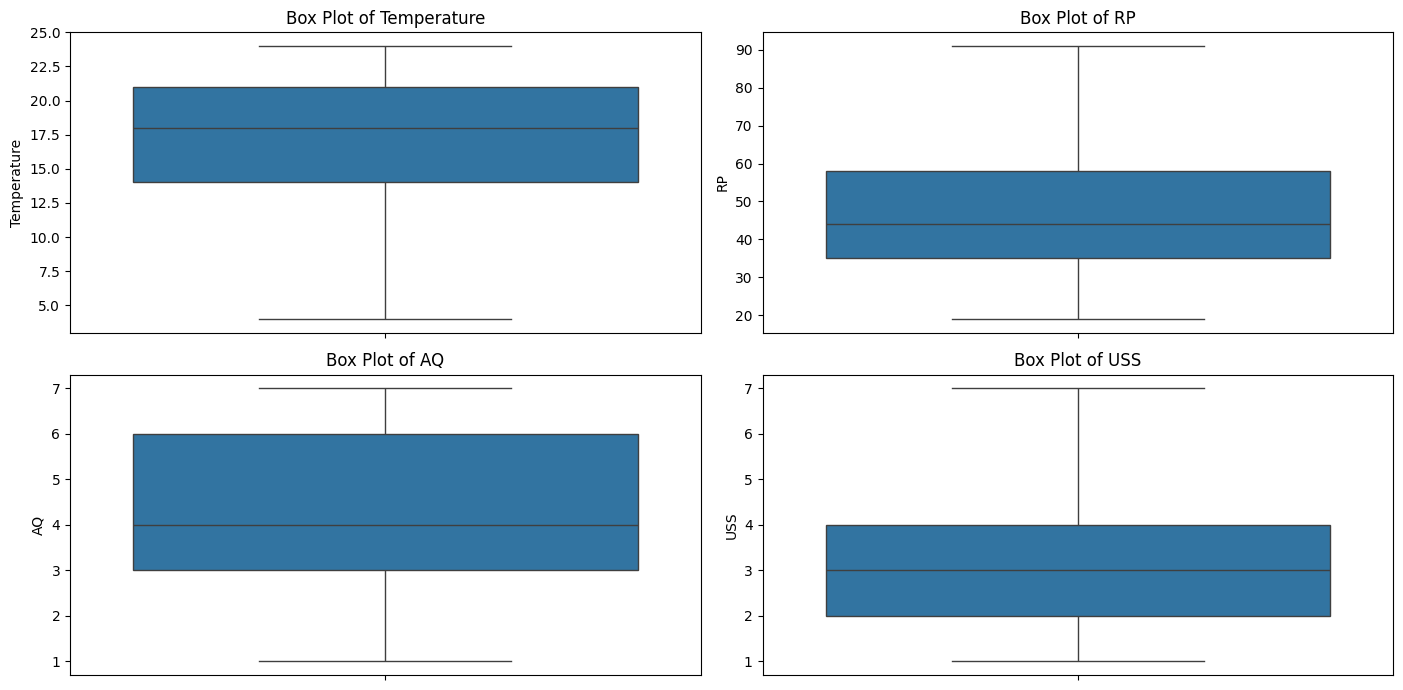

In [61]:
# Handling missing data
df.fillna(df.mean(), inplace=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Outlier Detection using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
        print(f"Number of outliers in '{column}':", outliers[column])

        # Optionally, remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Columns to check for outliers
columns_to_check = ['Temperature', 'RP', 'AQ', 'USS']
df = detect_outliers_iqr(df, columns_to_check)

# Box Plot Visualization
def plot_boxplots(df, columns):
    plt.figure(figsize=(14, 7))
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(df[column])
        plt.title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

# Plot box plots for outlier detection
plot_boxplots(df, columns_to_check)


In [62]:

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows if any
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {duplicate_rows} duplicate rows.")
else:
    print("No duplicate rows found.")


Number of duplicate rows: 1
Removed 1 duplicate rows.


In [63]:

from sklearn.preprocessing import LabelEncoder

# Check the actual column names in the DataFrame
print("Column names in the DataFrame:", df.columns)


correct_column_name = 'tempMode'


if correct_column_name in df.columns:
    # Encoding categorical variable
    label_encoder = LabelEncoder()
    df[correct_column_name] = label_encoder.fit_transform(df[correct_column_name])
    print(f"Encoded '{correct_column_name}' successfully.")
else:
    print(f"Column '{correct_column_name}' not found in the DataFrame.")


Column names in the DataFrame: Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')
Encoded 'tempMode' successfully.


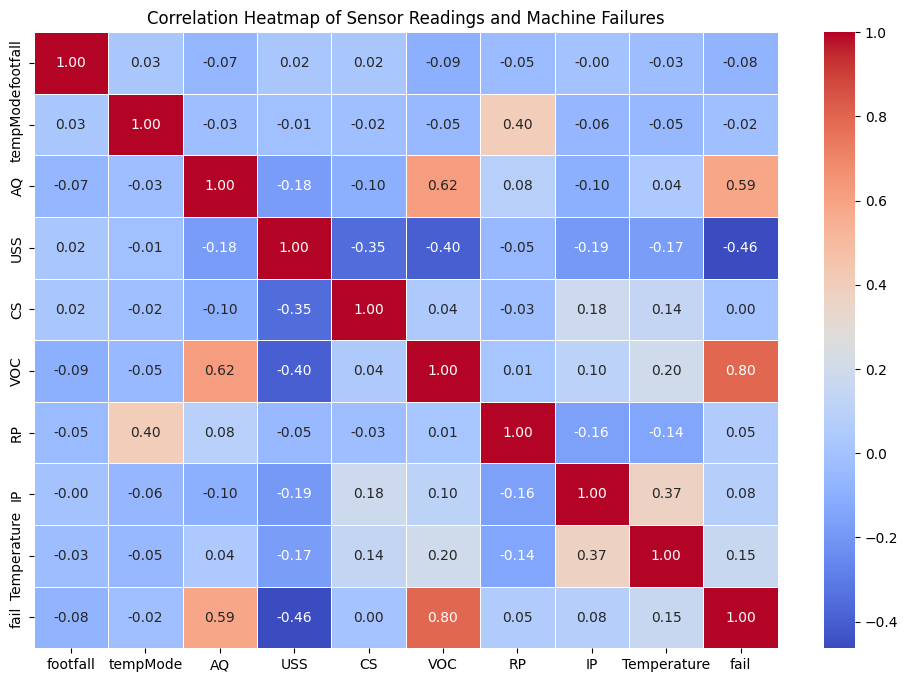

In [64]:
#Visualize how different sensor readings correlate with each other and the target variable
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Sensor Readings and Machine Failures')
plt.show()


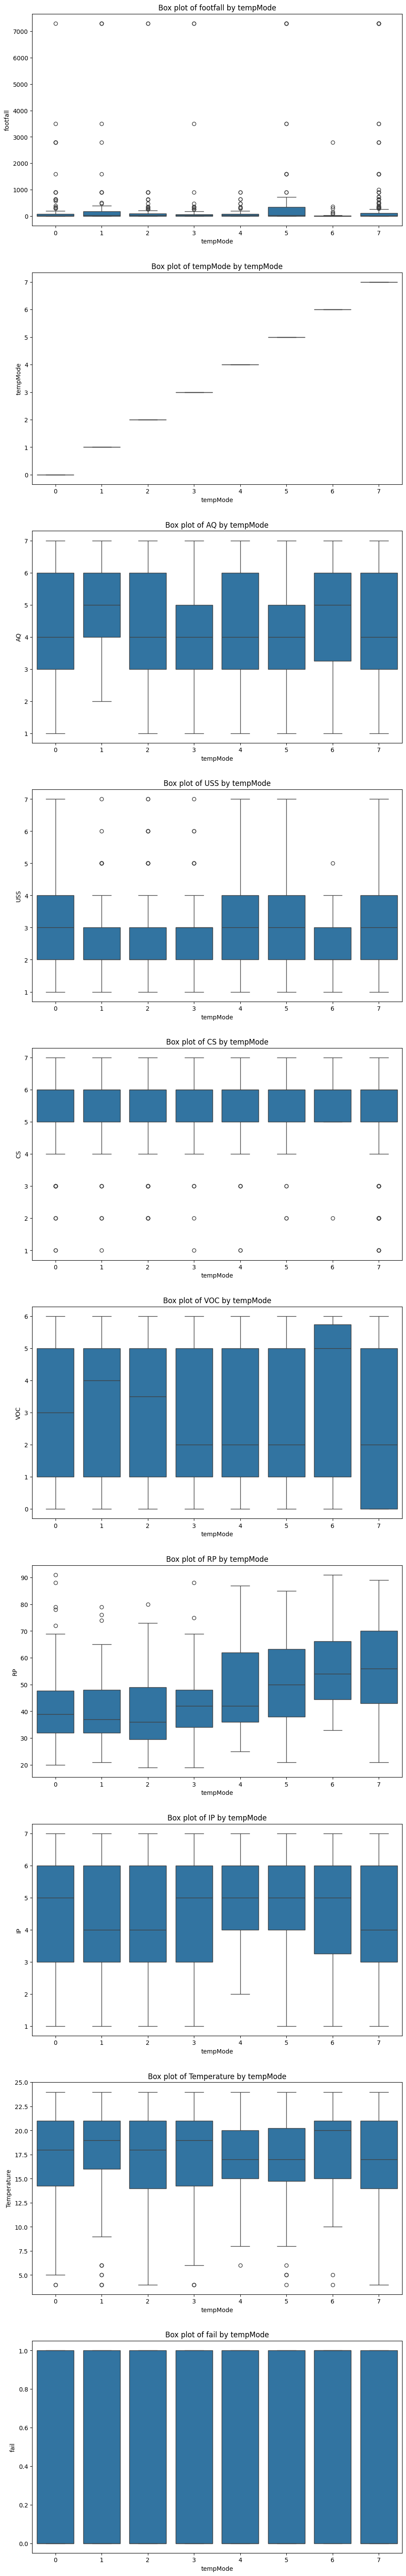

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of numerical columns
num_cols = len(df.select_dtypes(include=['number']).columns)

# Create a figure with multiple subplots
fig, axes = plt.subplots(num_cols, 1, figsize=(10, 6 * num_cols), sharex=False)

# Loop through each numerical column and create a box plot
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.boxplot(x='tempMode', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Box plot of {col} by tempMode')

# Adjust the layout to add space between subplots
plt.tight_layout(pad=3.0)
plt.show()


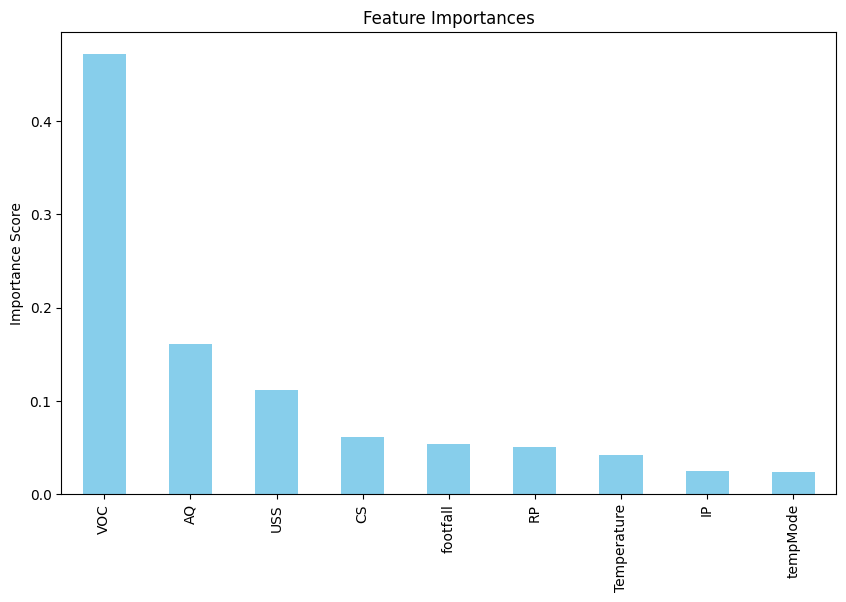

In [66]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt


X = df.drop('fail', axis=1)
y = df['fail']

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
indices.plot(kind='bar', color='skyblue')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.show()


In [67]:
import plotly.express as px


fig = px.scatter_3d(df, x='Temperature', y='CS', z='RP', color='fail',
                    title='3D Scatter Plot of Key Features by Failure Status')
fig.show()


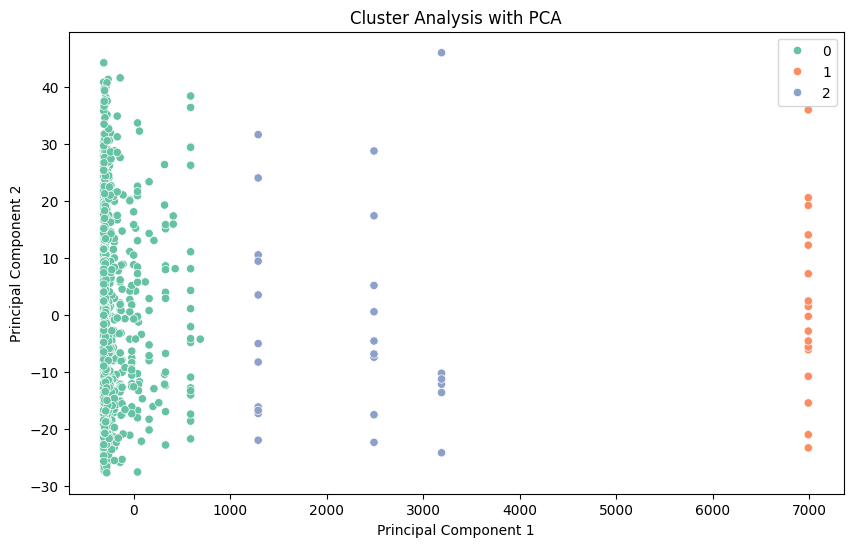

In [68]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


X = df.drop('fail', axis=1)

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply k-Means clustering with explicit n_init to suppress warning
kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(X)

# Plot PCA-reduced data with cluster assignments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Cluster Analysis with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


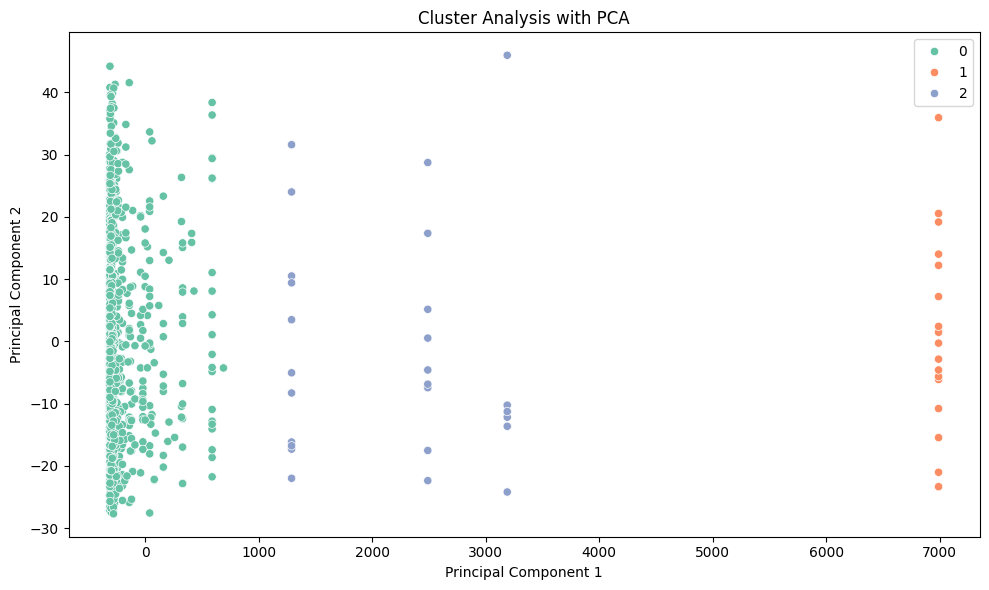

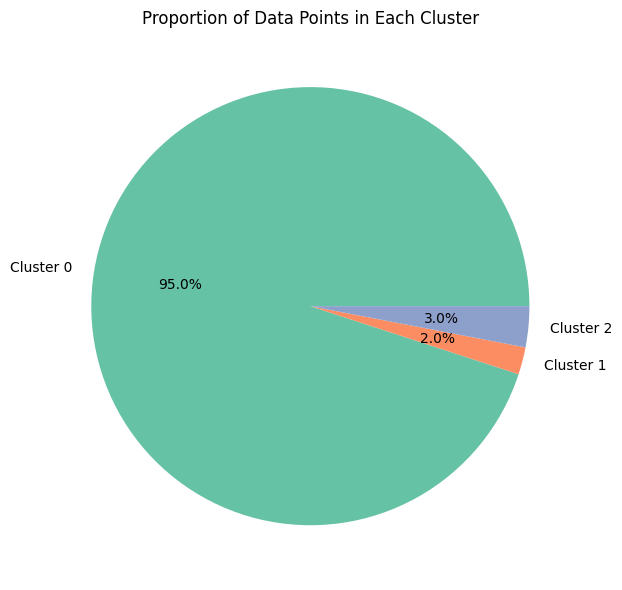

In [71]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X = df.drop('fail', axis=1)

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply k-Means clustering with explicit n_init to suppress warning
kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(X)

# Plot PCA-reduced data with cluster assignments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Cluster Analysis with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)  # Adjust space between plots if on the same figure
plt.show()

# Add a new figure to separate the pie chart visually
plt.figure(figsize=(8, 6))

# Count the number of points in each cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()

# Plot a pie chart for the cluster proportions
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in range(len(cluster_counts))],
        autopct='%1.1f%%', colors=sns.color_palette('Set2', len(cluster_counts)))
plt.title('Proportion of Data Points in Each Cluster')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()



--- Logistic Regression ---
Accuracy: 0.8885

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       163
           1       0.87      0.84      0.86       106

    accuracy                           0.89       269
   macro avg       0.89      0.88      0.88       269
weighted avg       0.89      0.89      0.89       269


--- Decision Tree ---
Accuracy: 0.8216

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       163
           1       0.78      0.75      0.77       106

    accuracy                           0.82       269
   macro avg       0.81      0.81      0.81       269
weighted avg       0.82      0.82      0.82       269


--- Random Forest ---
Accuracy: 0.8848

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.90

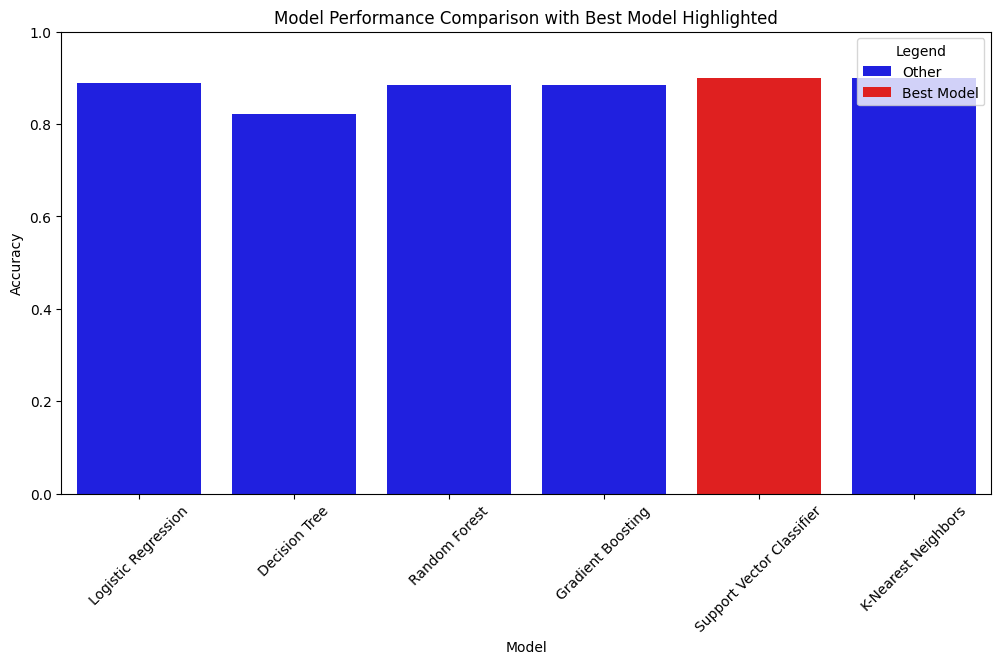

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace with your dataset path)
# df = pd.read_csv('your_dataset.csv')

# Prepare features and target variable
X = df[['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']].copy()
y = df['fail']

# Encode categorical features
label_encoder = LabelEncoder()
X.loc[:, 'tempMode'] = label_encoder.fit_transform(X['tempMode'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Print detailed report
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report for {name}:\n{classification_report(y_test, y_pred)}")

# Identify and print the best model
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]

print(f"\nThe best performing model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}.")
print("Here is a summary of the accuracy for each model:")
for model_name, acc in results.items():
    print(f" - {model_name}: {acc:.4f}")

print(f"\ choose the model with the highest accuracy for your predictive maintenance task. In this case, {best_model_name} is the most accurate.")

# Visualization with Highlighted Best Model
def plot_model_performance(results, best_model_name):
    model_names = list(results.keys())
    accuracies = list(results.values())

    # Create a DataFrame for easier plotting
    performance_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracies
    })

    # Highlight the best model
    performance_df['Highlight'] = np.where(performance_df['Model'] == best_model_name, 'Best Model', 'Other')

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Accuracy', hue='Highlight', data=performance_df, palette={'Best Model': 'red', 'Other': 'blue'})
    plt.title('Model Performance Comparison with Best Model Highlighted')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.legend(title='Legend')
    plt.show()

plot_model_performance(results, best_model_name)


Best Parameters: {'svm__C': 0.01, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best Cross-Validation Accuracy: 0.9154
Test Set Accuracy: 0.8848
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       163
           1       0.86      0.84      0.85       106

    accuracy                           0.88       269
   macro avg       0.88      0.88      0.88       269
weighted avg       0.88      0.88      0.88       269

Cross-Validation Scores: [0.9        0.87777778 0.86666667 0.85555556 0.93333333 0.94382022
 0.94382022 0.8988764  0.91011236 0.93258427]
Mean Cross-Validation Accuracy: 0.9063


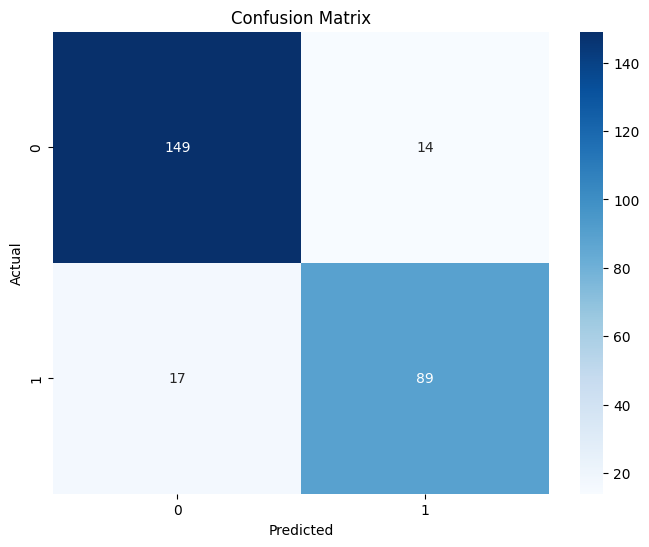

<Figure size 640x480 with 0 Axes>

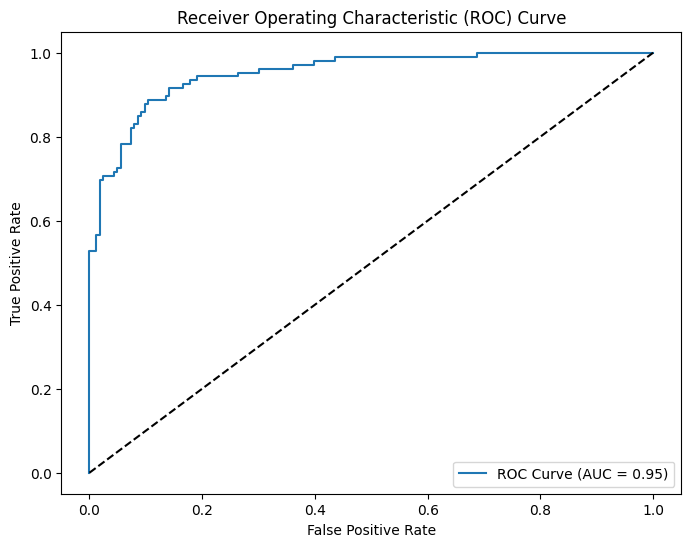

<Figure size 640x480 with 0 Axes>

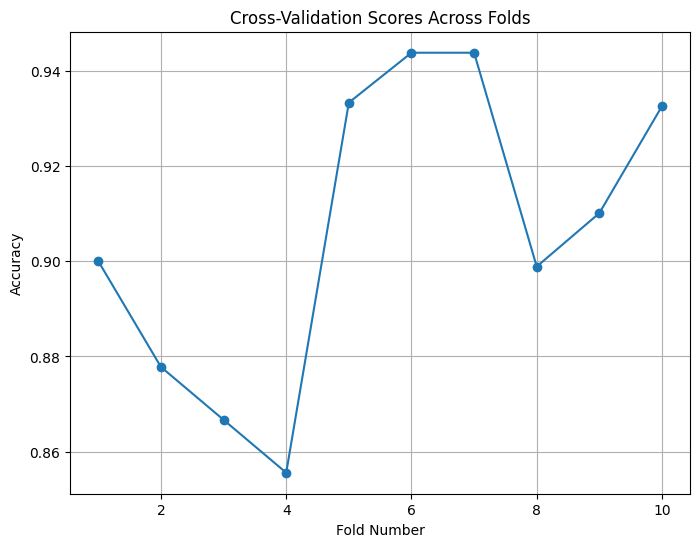


--- Output Explanation ---
1. Best Parameters: {'svm__C': 0.01, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
2. Best Cross-Validation Accuracy: 0.9154
3. Test Set Accuracy: 0.8848
4. Classification Report:
   - Precision, Recall, and F1-Score metrics are provided for both classes (0 and 1).
5. Cross-Validation Scores: [0.9        0.87777778 0.86666667 0.85555556 0.93333333 0.94382022
 0.94382022 0.8988764  0.91011236 0.93258427]
   - Mean Cross-Validation Accuracy: 0.9063


In [73]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from joblib import parallel_backend

 #This script trains a Support Vector Machine (SVM) model to predict machine failures based on sensor data.
# It includes the following steps:
# 1. Data preparation: Splitting the data into features (X) and target (y), encoding categorical variables.
# 2. Model training: Using a pipeline with data scaling and SVM, with hyperparameter tuning using GridSearchCV.
# 3. Model evaluation: Measuring accuracy, generating a classification report, and evaluating the model using cross-validation.
# 4. Visualization: Plotting the confusion matrix, ROC curve, and cross-validation scores to visually assess the model's performance.

# Prepare features and target variable
X = df[['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']].copy()
y = df['fail']

# Encode categorical features
label_encoder = LabelEncoder()
X['tempMode'] = label_encoder.fit_transform(X['tempMode'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the SVM model
svm = SVC(probability=True)

# Create a pipeline that includes scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm)
])

# Define the hyperparameter grid for SVM
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

# Use threading backend to avoid the fork-related warning
with parallel_backend('threading'):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"Test Set Accuracy: {test_accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    cv_scores = cross_val_score(best_model, X, y, cv=KFold(n_splits=10, random_state=42, shuffle=True), n_jobs=-1)
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

    # Visualization 1: Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Spacing between plots
    plt.subplots_adjust(hspace=0.4)

    # Visualization 2: ROC Curve
    y_prob = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Spacing between plots
    plt.subplots_adjust(hspace=0.4)

    # Visualization 3: Cross-Validation Scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), cv_scores, marker='o')
    plt.title('Cross-Validation Scores Across Folds')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

# Output Explanation
print("\n--- Output Explanation ---")
print(f"1. Best Parameters: {grid_search.best_params_}")
print(f"2. Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
print(f"3. Test Set Accuracy: {test_accuracy:.4f}")
print("4. Classification Report:")
print("   - Precision, Recall, and F1-Score metrics are provided for both classes (0 and 1).")
print(f"5. Cross-Validation Scores: {cv_scores}")
print(f"   - Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4965 - loss: 0.7804 - val_accuracy: 0.8254 - val_loss: 0.6158
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6738 - loss: 0.6282 - val_accuracy: 0.8651 - val_loss: 0.5376
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7583 - loss: 0.5450 - val_accuracy: 0.8810 - val_loss: 0.4651
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8412 - loss: 0.4792 - val_accuracy: 0.8968 - val_loss: 0.3911
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8425 - loss: 0.4265 - val_accuracy: 0.9048 - val_loss: 0.3296
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8720 - loss: 0.3678 - val_accuracy: 0.9127 - val_loss: 0.2771
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8611 - loss: 0.3547 - val_accuracy: 0.9365 - val_loss: 0.2381
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8762 - loss: 0.3032 - val_accuracy: 0.9365 - val_loss

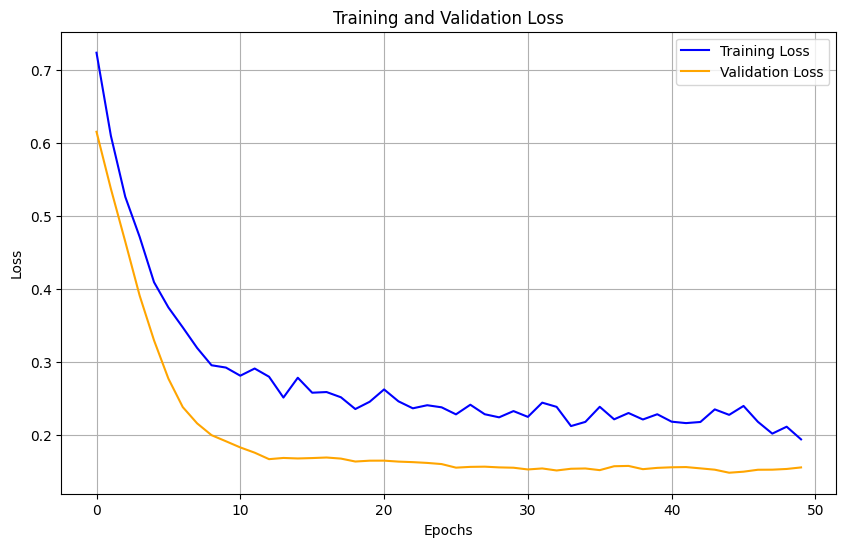

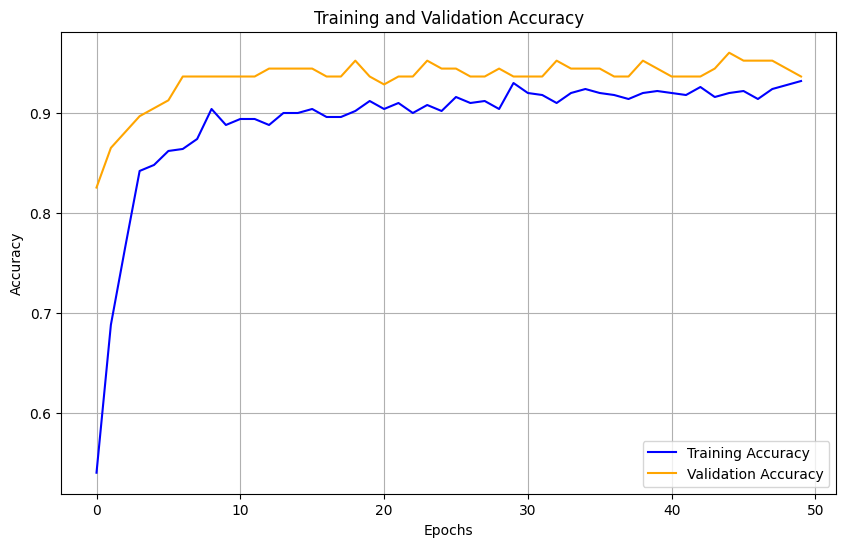


--- Output Explanation ---
The CNN model is trained to detect patterns in the features that may contribute to machine failures.
1. Test Set Accuracy indicates how well the CNN generalizes to new data.
2. The classification report provides insights into precision, recall, and F1-score for both classes (failure and no failure).
Using a CNN helps capture complex feature interactions that simpler models could miss, potentially improving prediction accuracy.


In [74]:
# Required Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Prepare features and target variable
X = df[['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']].copy()
y = df['fail']

# Encode categorical features
label_encoder = LabelEncoder()
X['tempMode'] = label_encoder.fit_transform(X['tempMode'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the CNN model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input shape
    Conv1D(filters=64, kernel_size=1, activation='relu'),  # Convolutional layer
    MaxPooling1D(pool_size=1),  # Pooling layer
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Visualization 1: Training & Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Training & Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Output Explanation
print("\n--- Output Explanation ---")
print("The CNN model is trained to detect patterns in the features that may contribute to machine failures.")
print("1. Test Set Accuracy indicates how well the CNN generalizes to new data.")
print("2. The classification report provides insights into precision, recall, and F1-score for both classes (failure and no failure).")
print("Using a CNN helps capture complex feature interactions that simpler models could miss, potentially improving prediction accuracy.")
